## AI0 Olympics : 100m dash
We are going to have 4 of our team members compete against each other in the 100m dash.

In [14]:
# Importing libraries
import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)
import numpy as np
from time import sleep
import os
from IPython.display import clear_output
from collections import Counter
import numpy as np
from IPython.display import clear_output
from time import sleep
import matplotlib.pyplot as plt
from prettytable import PrettyTable
plt.xkcd(scale=0,randomness=4)

In [15]:
# Helper code
class Sprinter:
    
    def __init__(self,base_speed,variance):
        self.base_speed = base_speed
        self.variance = variance
    
    @property
    def time(self):
        return np.random.normal(loc= self.base_speed,scale=self.variance)

def run_sim(race,winner, time):
    for i in range(1,11):
        clear_output(wait=True)
        print("|START|"+"\n|START|".join(['----'*min(10,int((15*i)/race[runner]))+ '    '*(10-min(10,int((15*i)/race[runner])))+'|'+runner for runner in race.keys()]))
        sleep(0.5)
    
    print(f'\nThe winner is {winner} with a time of {time:.2f}s!')   

## Taking a look at the competitors
Each participant has a characteristic assigned to him. The characteristic has 2 parts :

1. Base speed : This is the time they gave in a non-competitive environment.
2. Performance variance : Based on the mood, weather and other conditions this measure determines how much a participant's time will vary.

In [16]:
# Name of sprinters
sprinters = ['Pavlos','Shivas','Sheetal','Nawang']

# Defining charactersistics, ('Base pace','performance variance')
characteristics = [(13,0.25),(12.5,0.5),(12.25,1),(14.5,1)]
sprinters_dict = {}
for idx,sprinter in enumerate(sprinters):
    sprinters_dict[sprinter] = Sprinter(*characteristics[idx])

## Running a race
`sprinters_dict` has keys as the name of each participant, and the value as a class. The `time` attribute of the class is the time taken by that person to run a race. 
- Call `sprinters_dict['Pavlos'].time` for 10 different times. (Run the code block 10 times)

In [17]:
# Call time attribute
for i in range(10):
    pavlos_time = sprinters_dict['Pavlos'].time
    print(f'Time taken by Pavlos in race {i + 1}: {pavlos_time:.2f}s')

Time taken by Pavlos in race 1: 12.86s
Time taken by Pavlos in race 2: 13.31s
Time taken by Pavlos in race 3: 12.77s
Time taken by Pavlos in race 4: 13.32s
Time taken by Pavlos in race 5: 13.07s
Time taken by Pavlos in race 6: 12.90s
Time taken by Pavlos in race 7: 13.44s
Time taken by Pavlos in race 8: 12.96s
Time taken by Pavlos in race 9: 13.57s
Time taken by Pavlos in race 10: 12.93s


## ⏸ Pause & Think
Run the cell above, once again. What do you observe?

A. Output is different because the python compile memory location has changed

B. Output is the same

C. Output changes because it is a new sample from random process

In [18]:
### edTest(test_chow0) ###

# Submit an answer choice as a string below (eg. if you choose option A put 'A')

answer = 'C'

- Get the times for each participant by calling the `time` attribute and create a dictionary called `race`, which has the key as the name of the participant and value as the time taken by participant to run the race.
- Sort `race.items()` according to time and get the item in dictionary with the least time taken to finish and assign it to `winner`. 

In [20]:
### edTest(test_race) ###

# Get the times for each participant and make a dictionary
race = {name: sprinter.time for name, sprinter in sprinters_dict.items()}
# Then sort the items of the dictionary to get the winner
sorted_race = sorted(race.items(), key=lambda x: x[1])
# Hint: Remember to sort by the values and not the keys
winner = sorted_race[0]

## Race simulation

As you would have noticed, every time you make a new dictionary `race`, the results would differ.

Redefine the `race` dictionary, and run the cell below for a simulation of the race! 

In [21]:
# Again get the times for each participant and make a dictionary
race = {name: sprinter.time for name, sprinter in sprinters_dict.items()}
# Then sort the items of the dictionary to get the winner and time
sorted_race = sorted(race.items(), key=lambda x: x[1])
winner, time =  sorted_race[0]

# Uncomment and execute the following code
# run_sim(race,winner, time)

## Multiple simulations
Earlier was just one race, we want to find out who performs better over multiple races. So let's run the race 5 times

- Run a loop for 5 times
- In each loop generate the race dictionary as done earlier, and get the winner after sorting `race.items()`
- Append name of the winners to the `winner_list`

Keep track of everyone's timings

In [24]:
# Run the simulation and append winners to the winner_list
# Create an empty list
winner_list = []
# Run a simulation for 5 loops
for simulation in range(5):
    # Get the times for each participant and create the race dictionary
    race = {name: sprinter.time for name, sprinter in sprinters_dict.items()}
    
    # Sort the items of the dictionary by values (race times)
    sorted_race = sorted(race.items(), key=lambda x: x[1])
    
    # Get the winner (the item with the least time taken to finish)
    winner, time = sorted_race[0]
    
    # Append the name of the winner to the winner_list
    winner_list.append(winner)
    
print(winner_list)


['Shivas', 'Sheetal', 'Nawang', 'Sheetal', 'Shivas']


### Even more simulations

We will run 10,000 simulations and use the `Counter` to see who wins how many times.

Check the hints for how to use `Counter()`.

In [25]:
# Run the simulation and append winners to the winner_list
# Create an empty list
winner_list = []
# Run a simulation for 10,000 loops
for simulation in range(10000):
    # Get the times for each participant and create the race dictionary
    race = {name: sprinter.time for name, sprinter in sprinters_dict.items()}
    
    # Sort the items of the dictionary by values (race times)
    sorted_race = sorted(race.items(), key=lambda x: x[1])
    
    # Get the winner (the item with the least time taken to finish)
    winner, time = sorted_race[0]
    
    # Append the name of the winner to the winner_list
    winner_list.append(winner)
    
    # Use Counter to count how many times each participant wins
winner_counts = Counter(winner_list)
    
# Display first 5 entries from winner_list
top_winners = winner_counts.most_common(5)
top_winners

[('Sheetal', 5678), ('Shivas', 3664), ('Pavlos', 512), ('Nawang', 146)]

In [26]:
### edTest(test_wins) ###
from collections import Counter
# Get the counts for each person winning the race
wins = Counter(winner_list)

# Print wins to see the output of the simulation
print(wins)


Counter({'Sheetal': 5678, 'Shivas': 3664, 'Pavlos': 512, 'Nawang': 146})


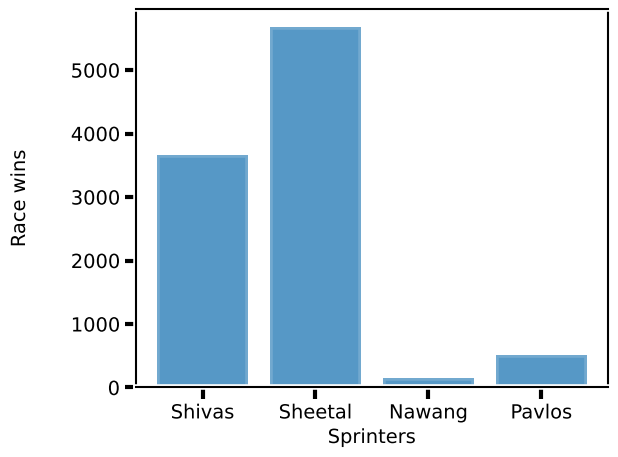

In [27]:
# Execute the code
plt.bar(list(wins.keys()),list(wins.values()),alpha=0.5)
plt.xlabel('Sprinters')
plt.ylabel('Race wins',rotation=90,labelpad=30)
plt.tight_layout()
plt.show()

## Why is Sheetal winning so much ?

Let us analyze why exactly is Sheetal winning so frequently in our simulations.
But first, we will need to record the sprint timings for each sprinter in every simulation.

We will again run 10,000 simulations but this time record the individual sprint timings for each simulation instead.

- Make a new dictionary `race_results` with keys as the name of sprinters and the value as an empty list. We will append race results to this list after each simulation.
- Run a simulation loop for 10000 times
- In each simulation loop over `sprinters_dict.items()` and for each participant:
    - Calculate time by calling `.time` 
    - `append` time to the list for particular key of `race_results`

In [28]:
# Run the earlier simulation loop for 10000 times
# Loop over the sprinters_dict items and for each participant
# Call time and append to the corresponding list in race_results

race_results = {name: [] for name in sprinters_dict.keys()}
for simulation in range(10000):
    for sprinter, sample_run in sprinters_dict.items():
        # For a given participant, call the .time attribute to get sprint timing
        sprint_timing = sample_run.time
        
        # Append the sprint_timing to the corresponding list in race_results
        race_results[sprinter].append(sprint_timing)

      

### Sample mean $\bar{x}$ sample standard deviation $s$


Now we have a list of times given by each participant. We have the complete distribution, so let's calculate the mean, standard deviation and confidence interval.

As discussed in the lecture, if we have a given sample, we can quickly compute the mean and standard deviation using `np.mean()` and `np.std()`.

Let's begin with the race results for `Pavlos`.

In [29]:
# Using the race_results dictionary, find the mean
# and std for 'Pavlos'

pavlos_mean = np.mean(race_results['Pavlos'])
pavlos_std = np.std(race_results['Pavlos'])
print(f'The average pace of Pavlos is {pavlos_mean:.2f} and the sample std is {pavlos_std:2f}')

The average pace of Pavlos is 13.00 and the sample std is 0.250525


### Sample mean $\bar{x}$ sample standard deviation $s$ for all sprinters

For each sprinter in the `race_results` dicitionary, find the mean and standard deviation of the 10,000 simulations using the `np.mean()` and `np.std()` functions.

Store your findings in a new dictionary called `race_stats`.

In [30]:
# Calculate mean and std of each participant


# Initialize an empty dictionary
race_stats = {}
# Loop over race_results.keys()
for sprinter in race_results.keys():
    # Calculate mean and standard deviation for the participant
    sprinter_mean = np.mean(race_results[sprinter])
    sprinter_std = np.std(race_results[sprinter])
    
    # Store the results as a list [mean, std] in race_stats
    race_stats[sprinter] = [sprinter_mean, sprinter_std]

In [31]:
# Use the helper code below to print your findings
pt = PrettyTable()

pt.field_names = ["Sprinter", "Sample mean", "Sample std"]

for sprinter,stats in race_stats.items():
    pt.add_row([sprinter, round(stats[0],3),round(stats[1],3)])

print(pt)

+----------+-------------+------------+
| Sprinter | Sample mean | Sample std |
+----------+-------------+------------+
|  Pavlos  |    13.002   |   0.251    |
|  Shivas  |    12.496   |   0.502    |
| Sheetal  |    12.249   |   1.001    |
|  Nawang  |    14.487   |   1.012    |
+----------+-------------+------------+


### Confidence Interval
Confidence interval is the range of values for which we can claim a certain confidence level(95% mostly). The confidence interval represents values for the population parameter for which the difference between the parameter and the observed estimate is not significant at the 5% level.

- Calculate the 95% CI by getting `np.percentile` at 2.5 and 97.5.
- Calculate and append these to the list of stats in the `race_stats` dictionary, for each participant

In [32]:
# By using the race_results dictionary defined above,
# Find the 2.5 and 97.5 percentile of Shivas' race runs.
# Hint : Use race_results['Shivas']
for sprinter in race_results.keys():
    # Calculate the 95% CI using np.percentile for the participant's race runs
    CI = np.percentile(race_results[sprinter], [2.5, 97.5])
    
    # Append the CI values to the list of stats in the race_stats dictionary
    race_stats[sprinter].append(CI)

    # Print the 95% CI for the participant
    print(f'The 95% confidence interval for {sprinter} is {round(CI[0], 2)} - {round(CI[1], 2)}')

The 95% confidence interval for Pavlos is 12.51 - 13.49
The 95% confidence interval for Shivas is 11.51 - 13.49
The 95% confidence interval for Sheetal is 10.27 - 14.19
The 95% confidence interval for Nawang is 12.49 - 16.5


### Confidence intervals for all sprinters.

Let's repeat the above for each sprinter.
You will add this information to your `race_stats` dictionary.

We expect you to extend stats list with the $2.5$ and the $97.5$ percentile values for each sprinter.

For e.g., if for `Pavlos`, we have `mean=13.00`, `std=0.1`, and CI as `(12.8,13.2)`, your `race_stats['Pavlos']` must look like: `[13.00,0.1,12.8,13.2]`.

In [33]:
# Now lets repeat the same, but for every sprinter
# run through the race_results dictionary for each sprinter
# find the confidence interval, and add it to the race_stats dictionary 
# defined above

for sprinter,runs in race_results.items():
    # Calculate the mean, std, and CI for the participant's race runs
    sprinter_mean = np.mean(runs)
    sprinter_std = np.std(runs)
    CI = np.percentile(runs, [2.5, 97.5])
    
    # Extend the existing list of stats for the sprinter in race_stats
    race_stats[sprinter].extend([sprinter_mean, sprinter_std, CI[0], CI[1]])

In [16]:
# Use the helper code below to print your findings
pt = PrettyTable()

pt.field_names = ["Sprinter", "Sample mean", "Sample std","95% CI"]

for sprinter,stats in race_stats.items():
    mean = round(stats[0],3)
    std = round(stats[1],3)
    confidence_interval = (round(stats[2],3),round(stats[3],3))
    pt.add_row([sprinter, mean,std,confidence_interval])

print(pt)

## Histogram plot for each sprinter

Run the following cell to get a cool plot for distribution of times.

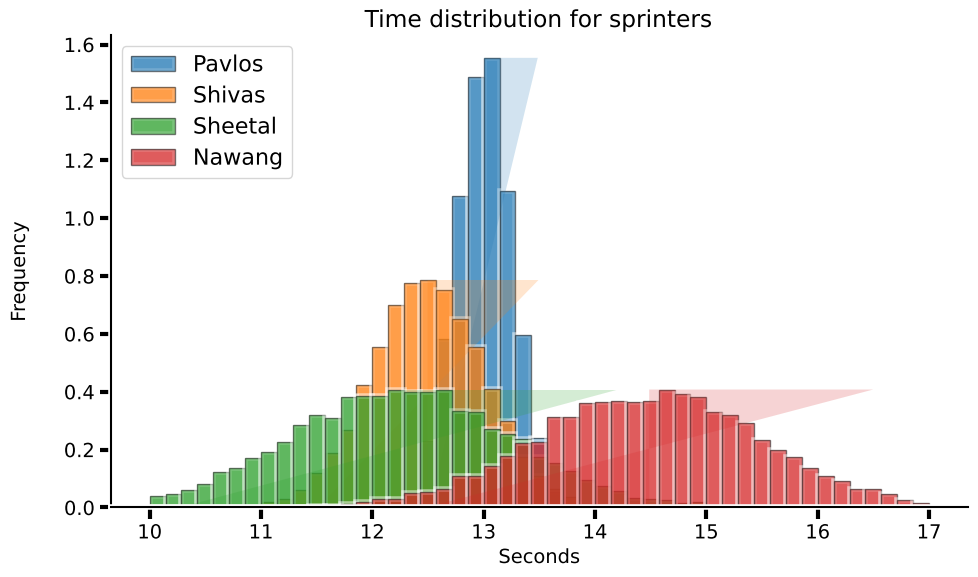

In [34]:
# Execute the code below
# Ignore the contents of the code for now

fig = plt.gcf()
fig.set_size_inches(10,6)
bins = np.linspace(10, 17, 50)

for sprinter,runs in race_results.items():
    height, bins, patches = plt.hist(runs, bins, alpha=0.5, \
                            label=sprinter,density=True,edgecolor='k')
    plt.fill_betweenx([0, height.max()], race_stats[sprinter][2], race_stats[sprinter][3], alpha=0.2)
plt.legend(loc='upper left',fontsize=16)
plt.xlabel('Seconds')
plt.ylabel('Frequency',rotation=90,labelpad=25)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Time distribution for sprinters')
plt.tight_layout()
plt.show()

## ⏸ Pause & Think

Take a look at the histograms for each participant and comment on why do you think is Sheetal winning more races?

In [35]:
### edTest(test_chow1) ###

# Write your answer as a string below

answer="Sheetal consistently finishes races faster than other competitors, as evidenced by the histogram, which displays that she has a lower time distribution. This can be as a result of her better speed, technique, or performance consistency."

## ⏸ Pause & Think
What **one parameter** should Shivas change in order to win more races?

**Note : Pick one that is most influential**

A. Improve consistency

B. Reduce base time

C. Increase base time

D. Relax and hydrate before the race

In [36]:
### edTest(test_chow2) ###

# Submit an answer choice as a string below (eg. if you choose option A put 'A')

answer = 'B'

#### Before you click 'submit', please comment out the run_sim function above

## 👩🏻‍🎓 Bonus (Not graded)

Find out who among has would have the most podium finishes (top 3).

In [18]:
# Your code here